In [308]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import heapq
import numpy as np

In [309]:
# helper function
def print_graph(G):

    elarge = [(u, v) for (u, v, d) in G.edges(data=True)]

    pos = nx.spring_layout(G,k=1000, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)

 
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [310]:
""" n = 100
G = nx.complete_graph(n)
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.randint(1,10)

print_graph(G) """

" n = 100\nG = nx.complete_graph(n)\nfor (u,v,w) in G.edges(data=True):\n    w['weight'] = random.randint(1,10)\n\nprint_graph(G) "

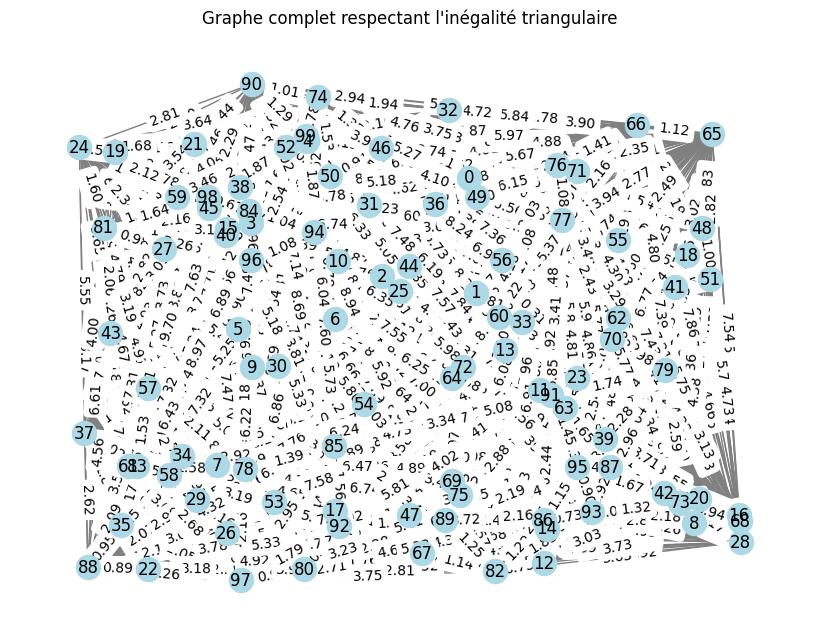

In [311]:
def generer_graphe_tsp(n):
    # Générer des positions aléatoires dans un espace 2D
    positions = {i: np.random.rand(2) for i in range(n)}
    
    # Créer un graphe complet respectant l'inégalité triangulaire
    G = nx.complete_graph(n)
    for i in range(n):
        for j in range(i + 1, n):
            # Calculer la distance euclidienne entre les points
            poids = np.linalg.norm(positions[i] - positions[j]) * 10
            G[i][j]['weight'] = poids
            G[j][i]['weight'] = poids  # Graphe non orienté

    return G, positions

# Paramètre : nombre de nœuds
n = 100
G, positions = generer_graphe_tsp(n)

# Dessiner le graphe
plt.figure(figsize=(8, 6))
nx.draw(G, pos=positions, with_labels=True, node_color='lightblue', edge_color='gray')
labels = {(i, j): f"{G[i][j]['weight']:.2f}" for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=labels)
plt.title("Graphe complet respectant l'inégalité triangulaire")
plt.show()

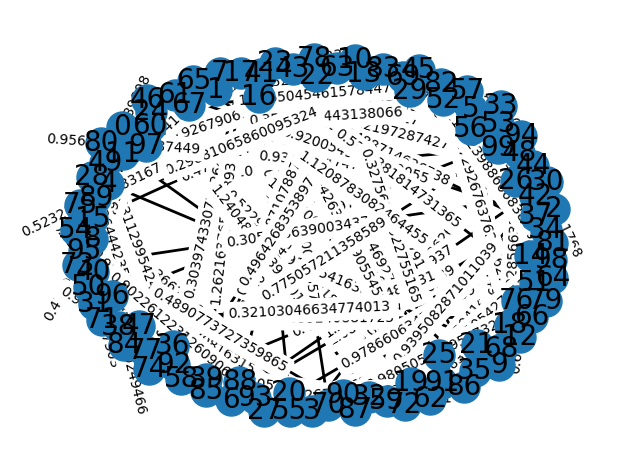

In [312]:
#weight = 0
T = nx.minimum_spanning_tree(G)

#for _,_,w in T.edges(data=True):
#    weight += w['weight']


print_graph(T)


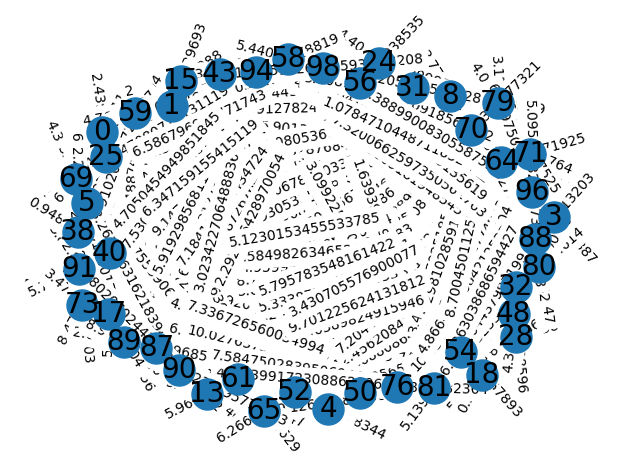

In [313]:
O = [node for node in T.nodes if T.degree[node] % 2 != 0]
sub_G = G.subgraph(O)
print_graph(sub_G)

{(13, 91), (73, 87), (70, 79), (69, 89), (71, 65), (24, 81), (0, 32), (96, 5), (58, 88), (38, 3), (52, 90), (4, 50), (40, 15), (76, 56), (31, 94), (17, 80), (18, 48), (8, 28), (64, 54), (59, 98), (1, 25), (61, 43)}
[(0, 49), (1, 60), (1, 56), (1, 44), (2, 25), (2, 44), (2, 10), (2, 6), (3, 84), (3, 15), (3, 94), (4, 99), (4, 52), (4, 50), (5, 9), (6, 30), (7, 78), (7, 34), (8, 73), (9, 30), (10, 94), (11, 91), (11, 13), (12, 14), (12, 82), (13, 33), (13, 72), (14, 86), (15, 40), (15, 45), (16, 68), (16, 20), (17, 92), (17, 53), (17, 85), (18, 48), (18, 51), (18, 55), (19, 24), (19, 21), (20, 73), (21, 98), (22, 88), (22, 35), (23, 91), (23, 70), (26, 29), (26, 97), (27, 40), (27, 81), (28, 68), (29, 58), (31, 50), (31, 36), (31, 94), (32, 46), (33, 60), (34, 58), (35, 61), (36, 49), (37, 61), (37, 57), (38, 84), (39, 87), (39, 63), (40, 96), (41, 51), (41, 62), (42, 73), (42, 87), (43, 57), (45, 98), (46, 50), (47, 89), (47, 92), (53, 78), (54, 85), (55, 77), (58, 83), (59, 98), (61, 8

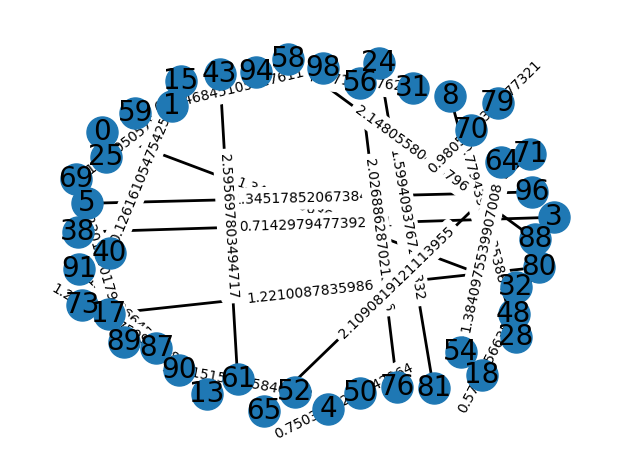

In [314]:
M = nx.algorithms.matching.min_weight_matching(sub_G)
assert(nx.algorithms.is_perfect_matching(sub_G,M))
#H = nx.MultiGraph(G.edges(data=True))
print(M)
print(list(T.edges))
H1 = G.edge_subgraph(list(M))
H2 = G.edge_subgraph(list(T.edges))
print_graph(H1)

[(0, 32), (0, 49), (32, 46), (1, 25), (1, 44), (1, 56), (1, 60), (25, 2), (3, 38), (3, 15), (3, 84), (3, 94), (38, 84), (4, 50), (4, 50), (4, 52), (4, 99), (50, 31), (50, 46), (5, 96), (5, 9), (96, 40), (8, 28), (8, 73), (28, 68), (13, 91), (13, 11), (13, 33), (13, 72), (91, 11), (91, 23), (91, 63), (15, 40), (15, 40), (15, 45), (40, 27), (17, 80), (17, 53), (17, 85), (17, 92), (80, 97), (18, 48), (18, 48), (18, 51), (18, 55), (24, 81), (24, 19), (81, 27), (31, 94), (31, 94), (31, 36), (94, 10), (43, 61), (43, 57), (61, 35), (61, 37), (61, 83), (52, 90), (90, 74), (54, 64), (54, 85), (64, 72), (56, 76), (76, 71), (58, 88), (58, 29), (58, 34), (58, 83), (88, 22), (59, 98), (59, 98), (98, 21), (98, 45), (65, 71), (65, 66), (71, 66), (71, 77), (69, 89), (69, 75), (89, 47), (89, 67), (89, 75), (70, 79), (70, 79), (70, 23), (70, 62), (73, 87), (73, 20), (73, 42), (87, 39), (87, 42), (87, 95), (49, 36), (44, 2), (60, 33), (2, 6), (2, 10), (6, 30), (99, 74), (9, 30), (7, 34), (7, 78), (78, 53

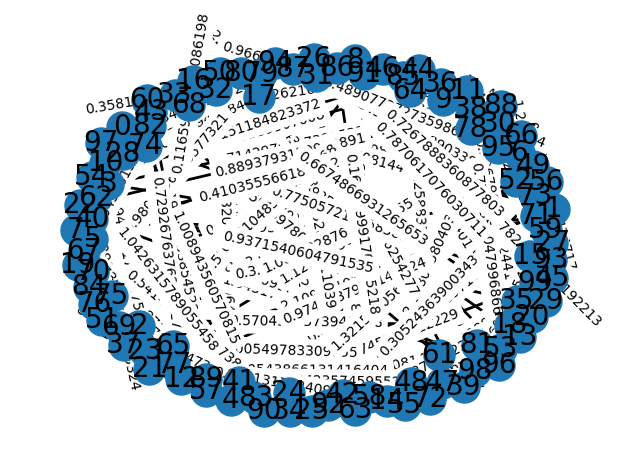

In [315]:
# Create a new MultiGraph and combine
H = nx.MultiGraph()
H.add_edges_from(H1.edges(data=True))
H.add_edges_from(H2.edges(data=True))
print(H.edges())
print_graph(H)

[(0, 49), (0, 32), (49, 36), (36, 31), (31, 94), (31, 94), (31, 50), (94, 10), (94, 3), (10, 2), (2, 44), (2, 25), (2, 6), (44, 1), (1, 60), (1, 56), (1, 25), (60, 33), (33, 13), (13, 72), (13, 11), (13, 91), (72, 64), (64, 54), (54, 85), (85, 17), (17, 53), (17, 80), (17, 92), (53, 78), (78, 7), (7, 34), (34, 58), (58, 83), (58, 88), (58, 29), (83, 61), (61, 37), (61, 43), (61, 35), (37, 57), (57, 43), (35, 22), (22, 88), (29, 26), (26, 97), (97, 80), (92, 47), (47, 89), (89, 75), (89, 69), (89, 67), (75, 69), (67, 82), (82, 12), (12, 14), (14, 86), (86, 93), (93, 95), (95, 87), (87, 42), (87, 73), (87, 39), (42, 73), (73, 20), (73, 8), (20, 16), (16, 68), (68, 28), (28, 8), (39, 63), (63, 91), (91, 11), (91, 23), (23, 70), (70, 79), (70, 79), (70, 62), (62, 41), (41, 51), (51, 18), (18, 48), (18, 48), (18, 55), (55, 77), (77, 71), (71, 66), (71, 65), (71, 76), (66, 65), (76, 56), (6, 30), (30, 9), (9, 5), (5, 96), (96, 40), (40, 27), (40, 15), (40, 15), (27, 81), (81, 24), (24, 19), 

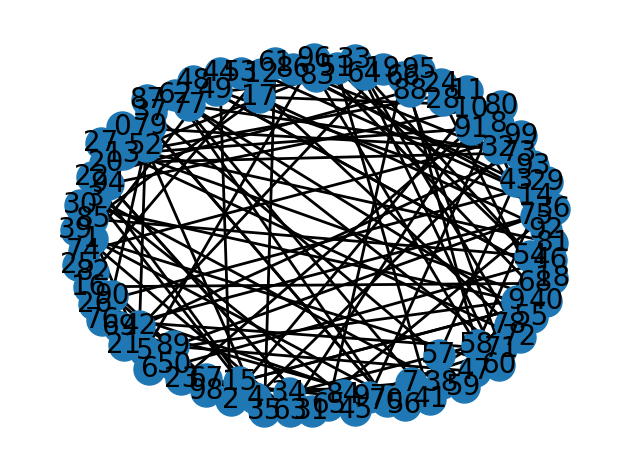

In [316]:
EH = nx.MultiGraph(nx.algorithms.eulerian_circuit(H))
print(EH.edges())
print_graph(EH)

In [317]:
[edge for edge in nx.algorithms.eulerian_circuit(H)]

[(0, 49),
 (49, 36),
 (36, 31),
 (31, 94),
 (94, 10),
 (10, 2),
 (2, 44),
 (44, 1),
 (1, 60),
 (60, 33),
 (33, 13),
 (13, 72),
 (72, 64),
 (64, 54),
 (54, 85),
 (85, 17),
 (17, 53),
 (53, 78),
 (78, 7),
 (7, 34),
 (34, 58),
 (58, 83),
 (83, 61),
 (61, 37),
 (37, 57),
 (57, 43),
 (43, 61),
 (61, 35),
 (35, 22),
 (22, 88),
 (88, 58),
 (58, 29),
 (29, 26),
 (26, 97),
 (97, 80),
 (80, 17),
 (17, 92),
 (92, 47),
 (47, 89),
 (89, 75),
 (75, 69),
 (69, 89),
 (89, 67),
 (67, 82),
 (82, 12),
 (12, 14),
 (14, 86),
 (86, 93),
 (93, 95),
 (95, 87),
 (87, 42),
 (42, 73),
 (73, 20),
 (20, 16),
 (16, 68),
 (68, 28),
 (28, 8),
 (8, 73),
 (73, 87),
 (87, 39),
 (39, 63),
 (63, 91),
 (91, 11),
 (11, 13),
 (13, 91),
 (91, 23),
 (23, 70),
 (70, 79),
 (79, 70),
 (70, 62),
 (62, 41),
 (41, 51),
 (51, 18),
 (18, 48),
 (48, 18),
 (18, 55),
 (55, 77),
 (77, 71),
 (71, 66),
 (66, 65),
 (65, 71),
 (71, 76),
 (76, 56),
 (56, 1),
 (1, 25),
 (25, 2),
 (2, 6),
 (6, 30),
 (30, 9),
 (9, 5),
 (5, 96),
 (96, 40),
 (40, 2

In [318]:
visited = []
edges = []
for edge in nx.algorithms.eulerian_circuit(H):
    if edge[0] not in visited:
        visited.append(edge[0])
        edges.append(edge)
visited


[0,
 49,
 36,
 31,
 94,
 10,
 2,
 44,
 1,
 60,
 33,
 13,
 72,
 64,
 54,
 85,
 17,
 53,
 78,
 7,
 34,
 58,
 83,
 61,
 37,
 57,
 43,
 35,
 22,
 88,
 29,
 26,
 97,
 80,
 92,
 47,
 89,
 75,
 69,
 67,
 82,
 12,
 14,
 86,
 93,
 95,
 87,
 42,
 73,
 20,
 16,
 68,
 28,
 8,
 39,
 63,
 91,
 11,
 23,
 70,
 79,
 62,
 41,
 51,
 18,
 48,
 55,
 77,
 71,
 66,
 65,
 76,
 56,
 25,
 6,
 30,
 9,
 5,
 96,
 40,
 27,
 81,
 24,
 19,
 21,
 98,
 59,
 45,
 15,
 3,
 84,
 38,
 50,
 4,
 99,
 74,
 90,
 52,
 46,
 32]

In [319]:
edge_list_tsp = [(visited[i],visited[i+1]) for i in range(len(visited)-1)]
edge_list_tsp.append((visited[-1],visited[0]))
edge_list_tsp

[(0, 49),
 (49, 36),
 (36, 31),
 (31, 94),
 (94, 10),
 (10, 2),
 (2, 44),
 (44, 1),
 (1, 60),
 (60, 33),
 (33, 13),
 (13, 72),
 (72, 64),
 (64, 54),
 (54, 85),
 (85, 17),
 (17, 53),
 (53, 78),
 (78, 7),
 (7, 34),
 (34, 58),
 (58, 83),
 (83, 61),
 (61, 37),
 (37, 57),
 (57, 43),
 (43, 35),
 (35, 22),
 (22, 88),
 (88, 29),
 (29, 26),
 (26, 97),
 (97, 80),
 (80, 92),
 (92, 47),
 (47, 89),
 (89, 75),
 (75, 69),
 (69, 67),
 (67, 82),
 (82, 12),
 (12, 14),
 (14, 86),
 (86, 93),
 (93, 95),
 (95, 87),
 (87, 42),
 (42, 73),
 (73, 20),
 (20, 16),
 (16, 68),
 (68, 28),
 (28, 8),
 (8, 39),
 (39, 63),
 (63, 91),
 (91, 11),
 (11, 23),
 (23, 70),
 (70, 79),
 (79, 62),
 (62, 41),
 (41, 51),
 (51, 18),
 (18, 48),
 (48, 55),
 (55, 77),
 (77, 71),
 (71, 66),
 (66, 65),
 (65, 76),
 (76, 56),
 (56, 25),
 (25, 6),
 (6, 30),
 (30, 9),
 (9, 5),
 (5, 96),
 (96, 40),
 (40, 27),
 (27, 81),
 (81, 24),
 (24, 19),
 (19, 21),
 (21, 98),
 (98, 59),
 (59, 45),
 (45, 15),
 (15, 3),
 (3, 84),
 (84, 38),
 (38, 50),
 (50,

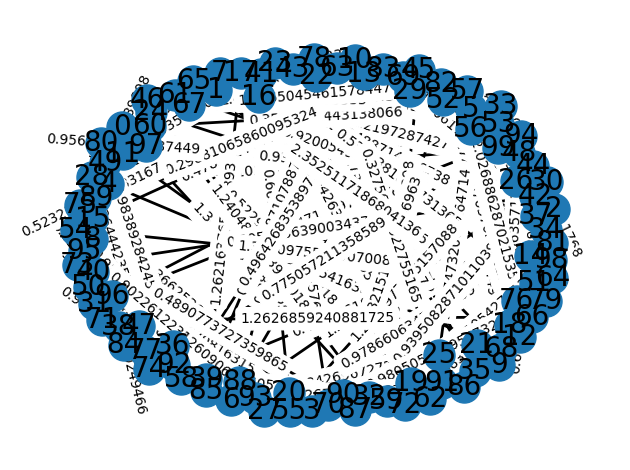

[(0, 32), (0, 49), (1, 44), (1, 60), (2, 10), (2, 44), (3, 15), (3, 84), (4, 50), (4, 99), (5, 9), (5, 96), (6, 25), (6, 30), (7, 34), (7, 78), (8, 28), (8, 39), (9, 30), (10, 94), (11, 23), (11, 91), (12, 14), (12, 82), (13, 33), (13, 72), (14, 86), (15, 45), (16, 20), (16, 68), (17, 53), (17, 85), (18, 48), (18, 51), (19, 21), (19, 24), (20, 73), (21, 98), (22, 35), (22, 88), (23, 70), (24, 81), (25, 56), (26, 29), (26, 97), (27, 40), (27, 81), (28, 68), (29, 88), (31, 36), (31, 94), (32, 46), (33, 60), (34, 58), (35, 43), (36, 49), (37, 57), (37, 61), (38, 50), (38, 84), (39, 63), (40, 96), (41, 51), (41, 62), (42, 73), (42, 87), (43, 57), (45, 59), (46, 52), (47, 89), (47, 92), (48, 55), (52, 90), (53, 78), (54, 64), (54, 85), (55, 77), (56, 76), (58, 83), (59, 98), (61, 83), (62, 79), (63, 91), (64, 72), (65, 66), (65, 76), (66, 71), (67, 69), (67, 82), (69, 75), (70, 79), (71, 77), (74, 90), (74, 99), (75, 89), (80, 92), (80, 97), (86, 93), (87, 95), (93, 95)]


In [320]:
final_G = G.edge_subgraph(edge_list_tsp)
print_graph(final_G)
print(final_G.edges)
assert nx.has_eulerian_path(final_G), 'Error: No Eulerian Path in final graph'

[0, 32, 46, 50, 4, 52, 90, 74, 99, 31, 94, 3, 38, 84, 15, 45, 98, 59, 21, 19, 24, 81, 27, 40, 96, 5, 9, 30, 6, 2, 25, 1, 56, 76, 71, 66, 65, 77, 55, 18, 48, 51, 41, 62, 70, 79, 23, 91, 13, 72, 64, 54, 85, 17, 80, 97, 26, 29, 58, 83, 61, 43, 57, 37, 35, 22, 88, 34, 7, 78, 53, 92, 47, 89, 69, 75, 67, 82, 12, 14, 86, 93, 95, 87, 42, 73, 20, 16, 68, 28, 8, 39, 63, 11, 33, 60, 44, 10, 36, 49, 0]


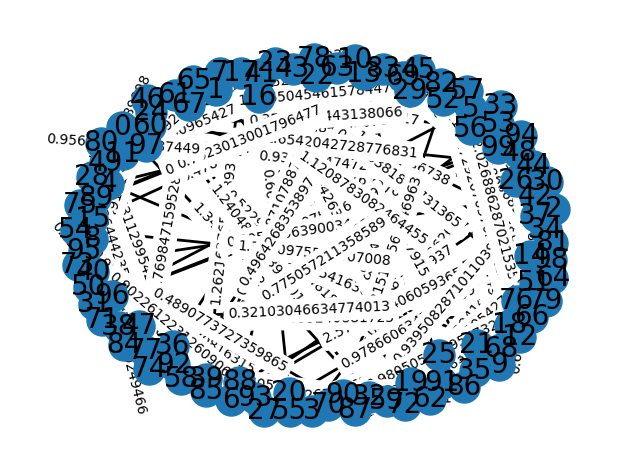

[(0, 32), (32, 46), (46, 50), (50, 4), (4, 52), (52, 90), (90, 74), (74, 99), (99, 31), (31, 94), (94, 3), (3, 38), (38, 84), (84, 15), (15, 45), (45, 98), (98, 59), (59, 21), (21, 19), (19, 24), (24, 81), (81, 27), (27, 40), (40, 96), (96, 5), (5, 9), (9, 30), (30, 6), (6, 2), (2, 25), (25, 1), (1, 56), (56, 76), (76, 71), (71, 66), (66, 65), (65, 77), (77, 55), (55, 18), (18, 48), (48, 51), (51, 41), (41, 62), (62, 70), (70, 79), (79, 23), (23, 91), (91, 13), (13, 72), (72, 64), (64, 54), (54, 85), (85, 17), (17, 80), (80, 97), (97, 26), (26, 29), (29, 58), (58, 83), (83, 61), (61, 43), (43, 57), (57, 37), (37, 35), (35, 22), (22, 88), (88, 34), (34, 7), (7, 78), (78, 53), (53, 92), (92, 47), (47, 89), (89, 69), (69, 75), (75, 67), (67, 82), (82, 12), (12, 14), (14, 86), (86, 93), (93, 95), (95, 87), (87, 42), (42, 73), (73, 20), (20, 16), (16, 68), (68, 28), (28, 8), (8, 39), (39, 63), (63, 11), (11, 33), (33, 60), (60, 44), (44, 10), (10, 36), (36, 49), (49, 0), (0, 0)]


In [321]:
visited_nx = nx.approximation.traveling_salesman_problem(G)
print(visited_nx)
edge_list_tsp_nx = [(visited_nx[i],visited_nx[i+1]) for i in range(len(visited_nx)-1)]
edge_list_tsp_nx.append((visited_nx[-1],visited_nx[0]))
final_G_nx = G.edge_subgraph(edge_list_tsp_nx)
print_graph(final_G_nx)
print(edge_list_tsp_nx)
assert nx.has_eulerian_path(final_G), 'Error: No Eulerian Path in final graph'

In [323]:
print(final_G.size(weight = 'weight'))
print(final_G_nx.size(weight = 'weight'))

87.47824985654552
91.66257516741373
